Step 1: Understand the problem
Is it Regression or Classification?
We are trying to predict whether a transaction is fradulent or not (isFraud : True or False). 
This is a Classification Problem.

Step 2 : Setup the envionment
Installed scikit-learn

Step 3: Load cleaned dataset

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2 = pd.read_csv("e:/2025/ExtensoData_Internship_Work/Projects/Task_3_EDA/data/dataset_after_EDA.xlsx")


In [162]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  float64
 10  posConditionCode          641914 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

(641914, 32)

In [163]:
# changing datetime columun to datetime format
df2['transactionDateTime'] = pd.to_datetime(df2['transactionDateTime'])
df2["accountOpenDate"] = pd.to_datetime(df2["accountOpenDate"])
df2['currentExpDate'] = pd.to_datetime(df2['currentExpDate'])
df2['dateOfLastAddressChange'] = pd.to_datetime(df2['dateOfLastAddressChange'])
df2['transactionDateTime'].dtype
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  float64       
 10  posConditionCode          641914 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

Step 4: Preprocessing
1. Drop unnecessary columns or use useful features only
2. Convert categorial variables ( use one-hot encoding or label 
encoding)
3. Split Features and target

In [164]:
# ✅ Choose meaningful features only
features = [
    'transactionAmount', 'availableMoney', 'creditLimit', 'currentBalance',
    'posEntryMode', 'posConditionCode', 'cardPresent','cvv_mismatch',
    'txn_hour', 'txn_month', 'weekday', 'is_weekend',
    'account_age_days',
    'acqCountry', 'merchantCountryCode', 'merchantCategoryCode',
    'transactionType'
    # , 'txn_day','expirationDateKeyInMatch', 'age_bin'
]

X = df2[features]
y = df2['isFraud']


In [165]:
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Optional: scale if needed


Step 5: Train/Test Split

In [166]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # Ensures reproducibility
    stratify=y            # Preserves fraud/non-fraud ratio
)


Step 6: Training model using K-Nearest Neighbors Alogrithm (KNN)

In [167]:
# 
# knn = KNeighborsClassifier(n_neighbors= 5)
# knn.fit(X_train, y_train)
# print(knn.score(X_test, y_test))
#took long time and my laptop started heatin up

In [168]:
# from sklearn.neighbors import KNeighborsClassifier
# # Use a smaller sample to test if your code works
# X_train_small = X_train.sample(10000, random_state=42)
# y_train_small = y_train.loc[X_train_small.index]

# X_test_small = X_test.sample(2000, random_state=42)
# y_test_small = y_test.loc[X_test_small.index]

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_small, y_train_small)
# print(knn.score(X_test_small, y_test_small))


In [169]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_small_scaled = scaler.fit_transform(X_train_small)
# X_test_small_scaled = scaler.transform(X_test_small)

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_small_scaled, y_train_small)
# print(knn.score(X_test_small_scaled, y_test_small))


In [170]:
# from sklearn.metrics import classification_report

# y_pred = knn.predict(X_test_small_scaled)
# print(classification_report(y_test_small, y_pred))


Step 7 : Trying different neighbors less than 5 to check if the computation becomes fast

In [171]:

# knn = KNeighborsClassifier(n_neighbors= 3)
# knn.fit(X_train, y_train)
# print(knn.score(X_test, y_test))
#no again the laptop heated up

Step 7: Using Logistic Regression algorithm

Need to learn first .so tomorrow

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

Scale features

In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get actual feature names
if isinstance(X_train_scaled, pd.DataFrame):
    features_actual = X_train_scaled.columns.tolist()
else:
    features_actual = X_train.columns.tolist()


Train Logistic Regression with class balancing

In [174]:
model1 = LogisticRegression(max_iter=1000, class_weight='balanced')
model1.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Predict the scaled model

In [175]:
y_predict_LG = model1.predict(X_test_scaled)

Evaluate performance

In [176]:
print("Accuracy", accuracy_score(y_test, y_predict_LG))
print("confusion_matrix: \n", confusion_matrix(y_test,y_predict_LG))
print("Classification Report: \n", classification_report(y_test, y_predict_LG))

Accuracy 0.6650257432837681
confusion_matrix: 
 [[83971 42152]
 [  853  1407]]
Classification Report: 
               precision    recall  f1-score   support

       False       0.99      0.67      0.80    126123
        True       0.03      0.62      0.06      2260

    accuracy                           0.67    128383
   macro avg       0.51      0.64      0.43    128383
weighted avg       0.97      0.67      0.78    128383



### Observations after LogisticRegression
1. The model is detecing fraud. It correctly predicted 1,406 fraud cases out of 2,260 -> that's Recall = 0.62
2. It wrongly predicts  42,158 normal transactions as fraud (false positives). So precision = 0.03 : out of all transactions it flagged as fraud, only 3% were actually fraud.

Tuning the threshold

In [177]:
# Get predicted probabilities for the positive class (fraud)
y_probs_LG = model1.predict_proba(X_test_scaled)[:,1]

#apply custom threshold (eg. 0.3)
threshold_LG = 0.2
y_pred_custom_LG = (y_probs_LG > threshold_LG).astype(int)

#evaluate performance
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_custom_LG))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom_LG))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs_LG):.4f}")

Confusion Matrix: 
[[ 13870 112253]
 [     4   2256]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.11      0.20    126123
        True       0.02      1.00      0.04      2260

    accuracy                           0.13    128383
   macro avg       0.51      0.55      0.12    128383
weighted avg       0.98      0.13      0.20    128383

ROC AUC Score: 0.7046


Observations after threshold : 0.2
1. Lowering the threshold means our model becomes more "generous" in classifying observations as fraud. Almost anything with fraud probability above 0.2 is predicted as fraud, so you catch nearly all fraud cases (high recall). But this also increases the false positives, as many non-fraud cases have predicted probabilities above 0.2. Hence, precision drops drastically. 
2. Catch around all fraud,  but many false alarms.

## Random Forest classification algo

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#creating random forest model with balanced class weights
model3 = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, n_jobs=-1)

#train the model
model3.fit(X_train_scaled, y_train)

#predict on test data
y_pred_forest = model3.predict(X_test_scaled)
y_probs_forest = model3.predict_proba(X_test_scaled)[:,1]

#performance evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest))

roc_auc = roc_auc_score(y_test, y_probs_forest)
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[126123      0]
 [  2251      9]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    126123
        True       1.00      0.00      0.01      2260

    accuracy                           0.98    128383
   macro avg       0.99      0.50      0.50    128383
weighted avg       0.98      0.98      0.97    128383

ROC AUC Score: 0.6998


Tuning the decison threshold

In [179]:
threshold = 0.2
y_pred_custom_forest = (y_probs_forest > threshold).astype(int)

#evalute model performance
print("Cunfusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom_forest))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_custom_forest))

roc_auc = roc_auc_score(y_test,y_probs_forest)
print(f"\n ROC AUC Score: {roc_auc:.4f}")

Cunfusion Matrix:
[[126009    114]
 [  2202     58]]

Classification Report: 
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    126123
        True       0.34      0.03      0.05      2260

    accuracy                           0.98    128383
   macro avg       0.66      0.51      0.52    128383
weighted avg       0.97      0.98      0.97    128383


 ROC AUC Score: 0.6998


How metrics change with different thresholds

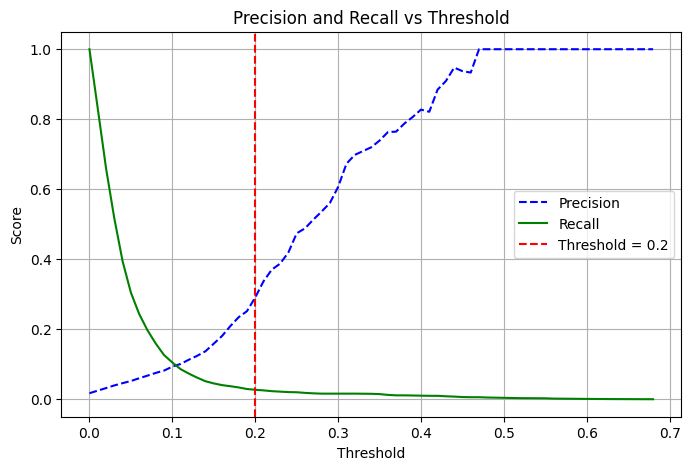

In [180]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_forest)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

Automatcially find the best threshold 

In [181]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_forest)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-10)

best_idx = np.argmax(f1_scores)
best_threshold_forest = thresholds[best_idx]
print(f"✅ Best Threshold = {best_threshold_forest:.3f} with F1-score = {f1_scores[best_idx]:.3f}")


✅ Best Threshold = 0.080 with F1-score = 0.103


re-plot the best threshold

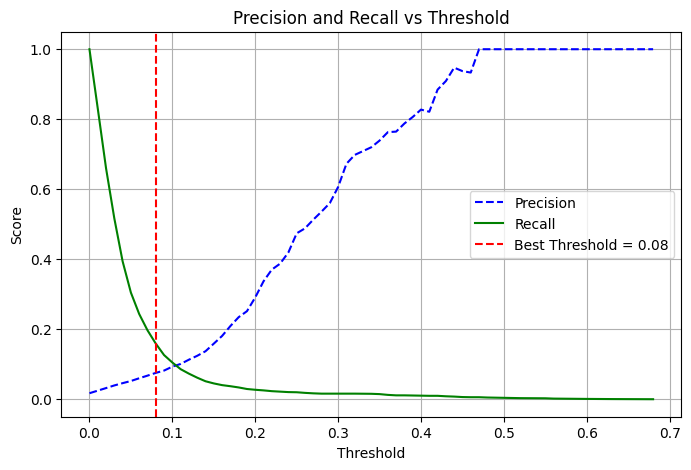

In [182]:
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.axvline(x=best_threshold_forest, color='red', linestyle='--', label=f'Best Threshold = {best_threshold_forest:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [183]:
y_pred_best = (y_probs_forest > best_threshold_forest).astype(int)
#evalute model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_best))

roc_auc = roc_auc_score(y_test,y_probs_forest)
print(f"\n ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[122933   3190]
 [  1974    286]]

Classification Report: 
              precision    recall  f1-score   support

       False       0.98      0.97      0.98    126123
        True       0.08      0.13      0.10      2260

    accuracy                           0.96    128383
   macro avg       0.53      0.55      0.54    128383
weighted avg       0.97      0.96      0.96    128383


 ROC AUC Score: 0.6998


Observations:
1. The threshold tuning did help to catch more frauds than standard 0.5
2. Still many missed frauds.
3. Acceptable ROC AUC: The model has learned something meaningful

Applying SMOTE with Random Forest 

In [184]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 2: Create the Random Forest model (you can still use class_weight='balanced' or not)
model3 = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100, n_jobs=-1)

# Step 3: Train the model on the resampled (balanced) data
model3.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict on the original test data (no SMOTE on test set!)
y_pred_forest = model3.predict(X_test_scaled)
y_probs_forest = model3.predict_proba(X_test_scaled)[:,1]

# Step 5: Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest))

roc_auc = roc_auc_score(y_test, y_probs_forest)
print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[28435 97688]
 [  392  1868]]

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.23      0.37    126123
        True       0.02      0.83      0.04      2260

    accuracy                           0.24    128383
   macro avg       0.50      0.53      0.20    128383
weighted avg       0.97      0.24      0.36    128383

ROC AUC Score: 0.6014


In [185]:
print("Number of features in training data:", X_train_scaled.shape[1])
print("Number of features in features list:", len(features))
print("Number of importances:", len(model3.feature_importances_))


Number of features in training data: 39
Number of features in features list: 17
Number of importances: 39


In [ ]:
if isinstance(X_train_scaled, pd.DataFrame):
    features_actual = X_train_scaled.columns.tolist()
else:
    features_actual = [f'feature_{i}' for i in range(X_train_scaled.shape[1])]



['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38']


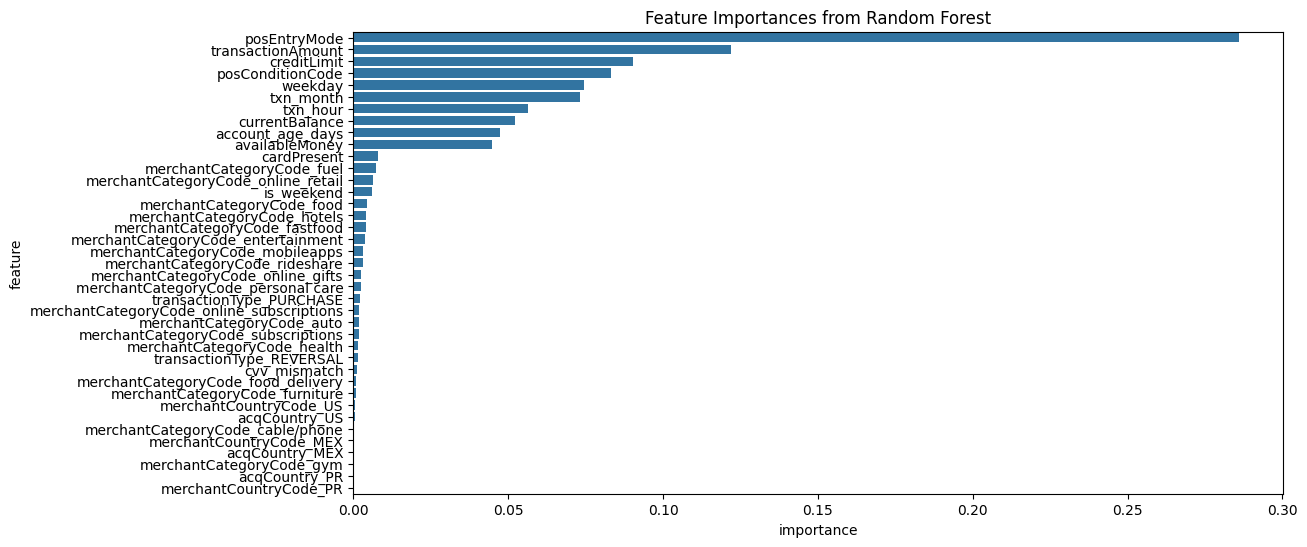

                                      feature  importance
4                                posEntryMode    0.286047
0                           transactionAmount    0.122051
2                                 creditLimit    0.090415
5                            posConditionCode    0.083158
10                                    weekday    0.074546
9                                   txn_month    0.073033
8                                    txn_hour    0.056318
3                              currentBalance    0.052289
12                           account_age_days    0.047184
1                              availableMoney    0.044778
6                                 cardPresent    0.007812
25                  merchantCategoryCode_fuel    0.007408
32         merchantCategoryCode_online_retail    0.006418
11                                 is_weekend    0.006155
23                  merchantCategoryCode_food    0.004245
29                merchantCategoryCode_hotels    0.004197
22            

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp_df = pd.DataFrame({
    'feature': features_actual,
    'importance': model3.feature_importances_
}).sort_values(by='importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(12,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df)
plt.title('Feature Importances from Random Forest')
plt.show()

print(feat_imp_df)


In [191]:
low_importance_features = [
    'acqCountry_US', 'acqCountry_MEX', 'acqCountry_PR',
    'merchantCountryCode_US', 'merchantCountryCode_MEX', 'merchantCountryCode_PR',
    'cvv_mismatch', 'merchantCategoryCode_food_delivery',
    'merchantCategoryCode_furniture', 'merchantCategoryCode_gym',
    'merchantCategoryCode_auto', 'merchantCategoryCode_online_gifts',
    'merchantCategoryCode_rideshare', 'merchantCategoryCode_subscriptions',
    'transactionType_REVERSAL', 'transactionType_PURCHASE'
]

X_train1 = X_train.drop(columns=low_importance_features)
X_test1 = X_test.drop(columns=low_importance_features)

#rescale 
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

#retrain
model3.fit(X_train_scaled1, y_train)


#predict on test data
y_pred_forest1 = model3.predict(X_test_scaled1)
y_probs_forest1 = model3.predict_proba(X_test_scaled1)[:,1]

#performance evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest1))

roc_auc = roc_auc_score(y_test, y_probs_forest1)
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[126123      0]
 [  2237     23]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    126123
        True       1.00      0.01      0.02      2260

    accuracy                           0.98    128383
   macro avg       0.99      0.51      0.51    128383
weighted avg       0.98      0.98      0.97    128383

ROC AUC Score: 0.7003


Observations after removing low importance features
1. Recall for Fraud(1) dropped to 0.01 , which is extremely low
2. F1-score for fraud is also poor: 0.02
3. This means the model is not detecting frauds well anymore - it's predicting almost everythings as non-fraud.

So I might have removed some useful features for fraud detection, or the data is too imbalanced and needs better resampling or feature engineering.